
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic dataset for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

y = y.reshape(-1)

print(f"Data shape: X={X.shape}, y={y.shape}")


Data shape: X=(100, 1), y=(100,)


In [2]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        # Calculate mean and std for each feature for fitting
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler not fitted yet Call fit() first before transforming")
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [3]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr              # Learning Rate
        self.epochs = epochs      # Number of iterations
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initializing parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.epochs):
            # Forward Pass
            y_pred = np.dot(X, self.weights) + self.bias

            # Computing Loss(MSE)
            mse_loss = np.mean((y - y_pred) ** 2)
            l2_penalty = self.l2_lambda * np.sum(self.weights ** 2)
            total_loss = mse_loss + l2_penalty
            self.loss_history.append(total_loss)

            # Computing Gradients
            dw = (-2 / n_samples) * np.dot(X.T, (y - y_pred)) + (2 * self.l2_lambda * self.weights)

            # Gradient for bias (Bias is typically NOT regularized)
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # Updating Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

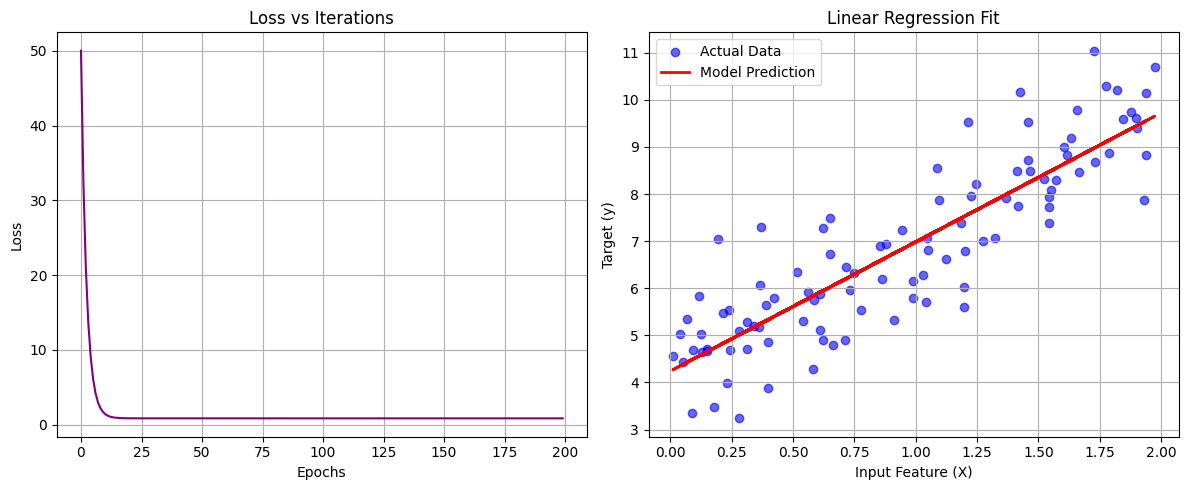

In [4]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the model
model = LinearRegression(lr=0.1, epochs=200, l2_lambda=0.01)
model.fit(X_scaled, y)

# Generating predictions
y_pred = model.predict(X_scaled)

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot 1: Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='purple')
plt.title("Loss vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

# Plot B: True vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Model Prediction')
plt.title("Linear Regression Fit")
plt.xlabel("Input Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    # Clipping z to avoid overflow/underflow in exp <-500 becomes 0 and >500 becomes 1
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

In [6]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr            #learning rate
        self.epochs = epochs    #number of iterations
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initializing parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias

            # Sigmoid activation
            y_pred = sigmoid(linear_model)

            # Computing loss
            bce_loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            l2_loss = self.l2_lambda * np.sum(self.weights ** 2)

            total_loss = bce_loss + l2_loss
            self.loss_history.append(total_loss)

            # Computing gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (2 * self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Updating parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        # Return probability (0 to 1)
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        # Convert probability to class label (0 or 1) using 0.5 threshold(binary classification)
        probabilities = self.predict_proba(X)
        return np.array([1 if p >= 0.5 else 0 for p in probabilities])

Final Accuracy: 92.33%


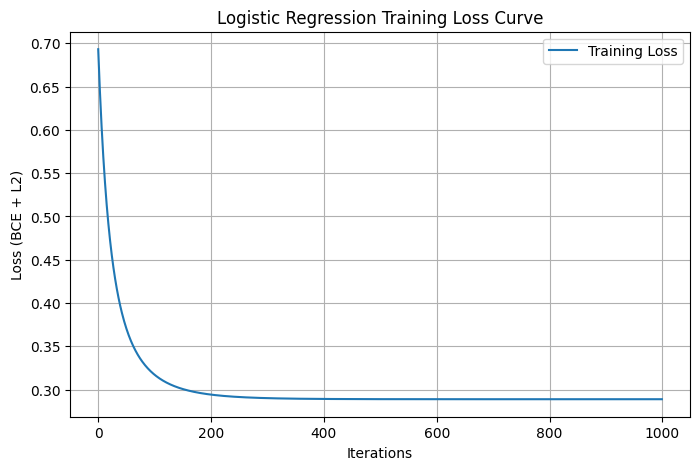

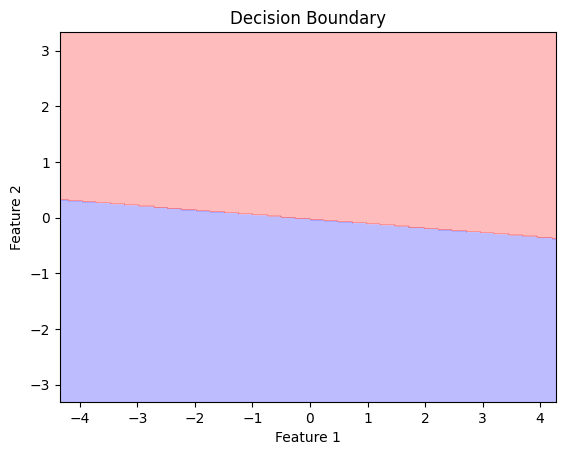

In [7]:
# Generating dataset using sklearn
from sklearn.datasets import make_classification
X_cls, y_cls = make_classification(n_samples=300, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1,
                                   random_state=42)

# Scaling Data
scaler_log = StandardScaler()
X_cls_scaled = scaler_log.fit_transform(X_cls)

# Training model
log_model = LogisticRegression(lr=0.1, epochs=1000, l2_lambda=0.01)
log_model.fit(X_cls_scaled, y_cls)

# Evaluating the results and printing the accuracy
y_pred_cls = log_model.predict(X_cls_scaled)
accuracy = np.mean(y_pred_cls == y_cls)

print(f"Final Accuracy: {accuracy * 100:.2f}%")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(log_model.loss_history, label='Training Loss')
plt.title("Logistic Regression Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss (BCE + L2)")
plt.legend()
plt.grid(True)
plt.show()

# Create=ing a mesh to plot the decision boundary
x_min, x_max = X_cls_scaled[:, 0].min() - 1, X_cls_scaled[:, 0].max() + 1
y_min, y_max = X_cls_scaled[:, 1].min() - 1, X_cls_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicting for the whole mesh
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.title(f"Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans_matrix(M, k, max_iters=100):
    rows, cols = M.shape

    # Flattening the data
    elements = M.flatten()

    # Initializing Centroids
    centroids = np.random.choice(elements, k, replace=False)

    # Placeholder for labels
    flat_labels = np.zeros(len(elements), dtype=int)

    for _ in range(max_iters):
        # Calculate distance from each element to each centroid
        distances = np.abs(elements[:, np.newaxis] - centroids)

        # Assigning to nearest centroid
        new_labels = np.argmin(distances, axis=1)

        # Updating Steps
        new_centroids = np.zeros(k)
        for i in range(k):
            # Get elements belonging to cluster i
            cluster_points = elements[new_labels == i]

            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points)
            else:
                # Handling empty cluster case (keep old centroid or re-init)
                new_centroids[i] = centroids[i]

        # Checking for convergence
        if np.allclose(centroids, new_centroids):
            flat_labels = new_labels
            break

        centroids = new_centroids
        flat_labels = new_labels

    # Constructing Assignment Table
    assignment_table = flat_labels.reshape(rows, cols)

    # Constructing Cookbook
    cookbook = {i: [] for i in range(k)}

    for r in range(rows):
        for c in range(cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    return assignment_table, cookbook, centroids

In [9]:
# Generate a Random Matrix M(10x10 matrix with values 0-100)
np.random.seed(42)
M = np.random.randint(0, 100, size=(10, 10))
k = 3

# Running k means
assignment_table, cookbook, final_centroids = kmeans_matrix(M, k=k)

# Printing the results
print("Original Matrix Shape:", M.shape)
print("Final Centroids:", np.round(final_centroids, 2))
print("\nAssignment Table:")
print(assignment_table)

print("\nCookbook:")
for cluster_id in sorted(cookbook.keys()):
    positions = cookbook[cluster_id]
    print(f"Cluster {cluster_id}: {positions[:3]} Total count: {len(positions)}")

Original Matrix Shape: (10, 10)
Final Centroids: [11.5  50.82 83.33]

Assignment Table:
[[1 2 0 2 1 0 2 2 2 2]
 [2 2 0 0 0 1 0 2 0 1]
 [0 1 1 0 1 2 1 0 2 1]
 [2 1 1 2 1 2 0 1 1 1]
 [1 1 1 1 0 1 0 0 2 1]
 [0 0 2 1 0 0 2 1 0 2]
 [2 1 2 1 0 1 1 2 2 1]
 [1 0 0 0 1 0 1 2 1 0]
 [2 1 1 2 1 2 0 2 1 0]
 [2 2 2 1 1 2 2 2 1 0]]

Cookbook:
Cluster 0: [(0, 2), (0, 5), (1, 2)] Total count: 28
Cluster 1: [(0, 0), (0, 4), (1, 5)] Total count: 39
Cluster 2: [(0, 1), (0, 3), (0, 6)] Total count: 33



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
